# Assignment 01

Created On : Tue Oct 12 2021

Last Modified : Sat Oct 16 2021

Course : MSBD5008 

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt

# Real World Graph

## Part (a)(i)
### The Real World graph dataset from http://snap.stanford.edu/data/wiki-Vote.html.

In [2]:
G=nx.read_edgelist("Wiki-Vote.txt",create_using=nx.DiGraph(),nodetype=int)

## Part (a)(ii)

### Determine Average Degree, Average In-Degree and Average Out-Degree

In [3]:
# Extract the degrees for all nodes and sum it up
nodes_list = list(G.nodes)
edges_list = list(G.edges)
total_nodes = len(nodes_list)
sum_out_d = 0
sum_in_d = 0
sum_d = 0
nodes_degree_list = [] # This variable is for plotting the Distribution of Degree
for node in nodes_list: # Sum up all types of degrees for each node in the graph
    sum_out_d += G.out_degree(node)
    sum_in_d += G.in_degree(node)
    sum_d += G.degree(node)
    nodes_degree_list.append(G.degree(node)) # This variable is for plotting the Distribution of Degree
# Average Degrees Information
avg_degree = sum_d/total_nodes
avg_outdegree = sum_out_d/total_nodes
avg_indegree = sum_in_d/total_nodes
### Print Results ###
print("\nPart(ii)")
print("Average Degree: {:.5f}\nAverage In-Degree: {:.5f}\nAverage Out-Degree: {:.5f}".format(avg_degree,avg_indegree, avg_outdegree))


Part(ii)
Average Degree: 29.14659
Average In-Degree: 14.57330
Average Out-Degree: 14.57330


### Degree Distribution (Linear Scale Plot and Log Scale Plot)

In [4]:
# remove duplicate degrees in the nodes_degree_list
# This is for the purpose of plotting the distribution 
degree_value_k = []
[degree_value_k.append(x) for x in nodes_degree_list if x not in degree_value_k]

# Count the frequency of each degree of distribution
degree_freq_list = []
for k in degree_value_k:
    count_degree = 0
    for degree_iterate in nodes_degree_list:
        if k == degree_iterate:
            count_degree += 1     
    degree_freq_list.append(count_degree)

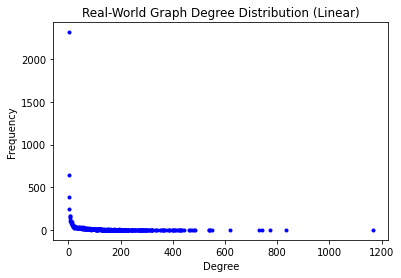

In [5]:
# Plot Linear Scale
plt.title('Real-World Graph Degree Distribution (Linear)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.plot(degree_value_k,degree_freq_list,'.b')
plt.show()

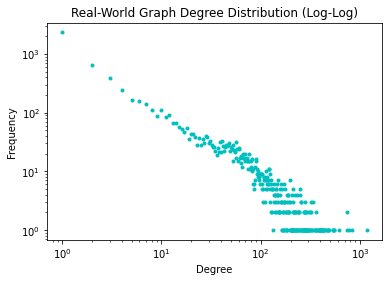

In [6]:
# Plot Log Scale
plt.title('Real-World Graph Degree Distribution (Log-Log)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.plot(degree_value_k,degree_freq_list,'.c')
plt.xscale("log")
plt.yscale("log")
plt.show()

### Determine Density (E/N^2)

In [7]:
### Density
density = len(edges_list)/(len(nodes_list)**2)
### Print Results ###
print("\nPart(ii)")
print("Density (E/N^2): {:.5f}".format(density))


Part(ii)
Density (E/N^2): 0.00205


## Part (a)(iii)
### Determine the Number of Nodes in the Largest Strongly Connected Component (Giant Component) (SCC)

In [8]:
# Determine the largest strongly connected component and output number of nodes in it #
largest_scc_set = max(nx.strongly_connected_components(G), key=len) # Give largest SCC sets of nodes
number_of_nodes_scc = len(largest_scc_set) # Gives the number of nodes in largest scc
### Print Results ###
print("\nPart(iii)")
print("Number of Nodes in Largest Strongly Connected Component: {}".format(number_of_nodes_scc))


Part(iii)
Number of Nodes in Largest Strongly Connected Component: 1300


In [9]:
# Generate a separate Graph for the Largest Strongly Connected Component
largest_scc_list = list(largest_scc_set)
G_Largest_SCC = G.subgraph(largest_scc_list)

#### Attempt to graph the Largest SCC ###
##plt.title('Largest SCC Graph')
##nx.draw_networkx(G_Largest_SCC, node_color = 'orange', edge_color= 'mistyrose',arrowstyle = "->", arrowsize = 2,node_size =10 ,alpha = 0.2)        
##plt.show()

print("Number of Edges in Largest Strongly Connected Component: {}".format(len(G_Largest_SCC.edges())))

Number of Edges in Largest Strongly Connected Component: 39456


## Part (a)(iv)
## Information about Largest SCC (Giant Component) related to Distance and Clustering

### Distribution of Path Length

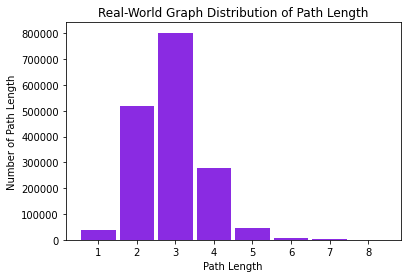

In [10]:
# Determine all the paths length available for every node to another node in the Largest SCC
# Compile all the possible path lengths and then plot the histogram distribution 
all_paths_list = []
for nodes in list(G_Largest_SCC.nodes()):
    all_distance = list(nx.shortest_path_length(G_Largest_SCC, source = nodes).values()) # Extract the path lengths from source to every target
    all_paths_list += all_distance # Store the extracted path lengths here
all_paths_list = list(filter(lambda x : x != 0, all_paths_list))

# Distribution of path length
plt.title('Real-World Graph Distribution of Path Length')
plt.xlabel('Path Length')
plt.ylabel('Number of Path Length')
#plt.yscale("log")
plt.hist(all_paths_list, bins =[1,2,3,4,5,6,7,8,9] ,align='left', rwidth=0.9,color='blueviolet')
plt.show()

### Average Path Length

In [11]:
# Average path length
path_len_avg = nx.average_shortest_path_length(G_Largest_SCC)
print("\nPart(iv)")
print("Average Path Length: {:.5f}".format(path_len_avg))


Part(iv)
Average Path Length: 2.87928


### Distribution of Clustering Coefficient

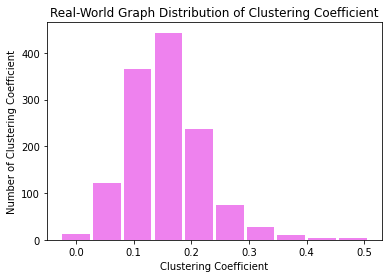

In [12]:
# Distribution of clustering coefficient
clustering_coef_dist = nx.clustering(G_Largest_SCC)
all_coef_list = [] # This will contain all of the clustering coefficient
for nodes in list(G_Largest_SCC.nodes()): # extract all the clustering coefficient of each node
    all_coef_list.append(clustering_coef_dist[nodes])
    
plt.title('Real-World Graph Distribution of Clustering Coefficient')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Clustering Coefficient')
#plt.yscale("log")
plt.hist(all_coef_list ,align='left', rwidth=0.9,color='violet')
plt.show()

### Average Clustering Coefficient

In [13]:
# Average clustering coefficient
clustering_coef_avg = nx.average_clustering(G_Largest_SCC)
print("\nPart(iv)")
print("Average Clustering Coefficient: {:.5f}".format(clustering_coef_avg))


Part(iv)
Average Clustering Coefficient: 0.18222


# Random Graph

## Part (b)(a) and (b)(b)
### Display the Random Graph (setting:  n = 1000, p = 0:01, seed=5008, directed=True)

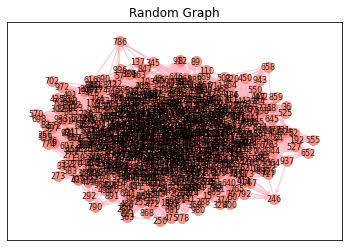

In [14]:
# Generate the random graph using the following function
G_random = nx.binomial_graph(n=1000, p=0.01, seed=5008, directed=True)
plt.title('Random Graph')
nx.draw_networkx(G_random, with_labels = 'False', arrowstyle = "->", arrowsize = 8, node_size =100 ,node_color='salmon',edge_color='lightpink',font_size = 8,alpha = 0.8)  
plt.show()

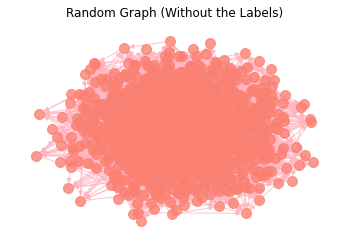

In [15]:
# Uncomment this section to display Random Graph without the Labels
plt.title('Random Graph (Without the Labels)')
nx.draw(G_random, node_size =100 ,node_color='salmon',edge_color='lightpink',font_size = 8,alpha = 0.8)  
plt.show()

## Part (b)(c)(ii)-(iv)
### repeat the same code from Part (a) (ii)-(iv)
### All the codes here onwards are similar to Part(a) (ii) -(iv)

### Determine Average Degree, Average In-Degree and Average Out-Degree

In [16]:
# Extract the degrees for all nodes and sum it up
nodes_list = list(G_random.nodes)
edges_list = list(G_random.edges)
total_nodes = len(nodes_list)
sum_out_d = 0
sum_in_d = 0
sum_d = 0
nodes_degree_list = [] # For Degree Distribution
for node in nodes_list:  # Sum up all the types of degrees for each node in the graph
    sum_out_d += G_random.out_degree(node)
    sum_in_d += G_random.in_degree(node)
    sum_d += G_random.degree(node)
    nodes_degree_list.append(G_random.degree(node))
# Average Degrees Information
avg_degree = sum_d/total_nodes
avg_outdegree = sum_out_d/total_nodes
avg_indegree = sum_in_d/total_nodes
### Print Results ###
print("\nPart(ii)")
print("Average Degree: {:.5f}\nAverage In-Degree: {:.5f}\nAverage Out-Degree: {:.5f}".format(avg_degree,avg_indegree, avg_outdegree))


Part(ii)
Average Degree: 19.70600
Average In-Degree: 9.85300
Average Out-Degree: 9.85300


### Degree Distribution (Linear Scale Plot and Log Scale Plot)

In [17]:
# remove duplicate degrees in the nodes_degree_list
# This is for the purpose of plotting the distribution 
degree_value_k = []
[degree_value_k.append(x) for x in nodes_degree_list if x not in degree_value_k]

# Count the frequency of each degree of distribution
degree_freq_list = []
for k in degree_value_k:
    count_degree = 0
    for degree_iterate in nodes_degree_list:
        if k == degree_iterate:
            count_degree += 1     
    degree_freq_list.append(count_degree)

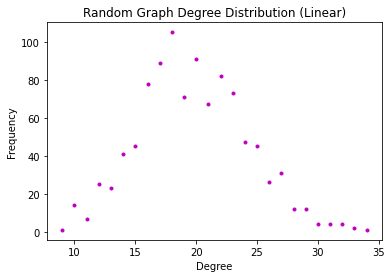

In [18]:
# Plot Linear Scale
plt.title('Random Graph Degree Distribution (Linear)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.plot(degree_value_k,degree_freq_list,'.m')
plt.show()

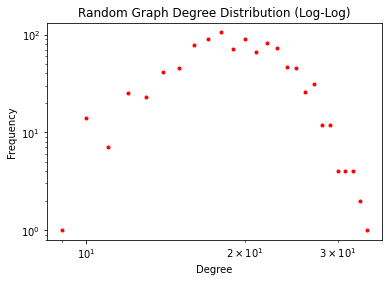

In [19]:
# Plot Log Scale
plt.title('Random Graph Degree Distribution (Log-Log)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.plot(degree_value_k,degree_freq_list,'.r')
plt.xscale("log")
plt.yscale("log")
plt.show()

### Determine Density (E/N^2)

In [20]:
### Density
density = len(edges_list)/(len(nodes_list)**2)
### Print Results ###
print("\nPart(ii)")
print("Density (E/N^2): {:.5f}".format(density))


Part(ii)
Density (E/N^2): 0.00985


### Determine the Number of Nodes in the Largest Strongly Connected Component (Giant Component) (SCC)

In [21]:
### Determine the largest strongly connected component and output number of nodes in it ###
largest_scc_set = max(nx.strongly_connected_components(G_random), key=len) # Give largest SCC sets of nodes
number_of_nodes_scc = len(largest_scc_set) # Gives the number of nodes in largest scc

### Print Results ###
print("\nPart(iii)")
print("Number of Nodes in Largest Strongly Connected Component: {}".format(number_of_nodes_scc))


Part(iii)
Number of Nodes in Largest Strongly Connected Component: 1000


In [22]:
### Generate a separate graph for the Largest Strongly Connected Component
largest_scc_list = list(largest_scc_set)
G_Largest_SCC = G_random.subgraph(largest_scc_list)

print("Number of Edges in Largest Strongly Connected Component: {}".format(len(G_Largest_SCC.edges())))

Number of Edges in Largest Strongly Connected Component: 9853


## Information about Largest SCC (Giant Component) related to Distance and Clustering

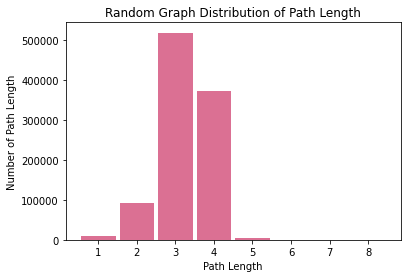

In [23]:
# Determine all the paths length available for every node to another node
all_paths_list = []
for nodes in list(G_Largest_SCC.nodes()):
    all_distance = list(nx.shortest_path_length(G_Largest_SCC, source = nodes).values())
    all_paths_list += all_distance
all_paths_list = list(filter(lambda x : x != 0, all_paths_list))

# Distribution of path length
plt.title('Random Graph Distribution of Path Length')
plt.xlabel('Path Length')
plt.ylabel('Number of Path Length')
#plt.yscale("log")
plt.hist(all_paths_list, bins =[1, 2, 3, 4,5,6,7,8,9] ,align='left', rwidth=0.9,color='palevioletred')
plt.show()

In [24]:
# Average path length
path_len_avg = nx.average_shortest_path_length(G_Largest_SCC)
print("\nPart(iv)")
print("Average Path Length: {:.5f}".format(path_len_avg))


Part(iv)
Average Path Length: 3.27140


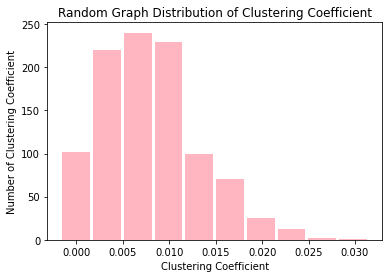

In [25]:
# Distribution of clustering coefficient
clustering_coef_dist = nx.clustering(G_Largest_SCC)
all_coef_list = []
for nodes in list(G_Largest_SCC.nodes()):
    all_coef_list.append(clustering_coef_dist[nodes])
    
plt.title('Random Graph Distribution of Clustering Coefficient')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Clustering Coefficient')
#plt.yscale("log")
plt.hist(all_coef_list ,align='left', rwidth=0.9,color='lightpink')
plt.show()

In [26]:
# Average clustering coefficient
clustering_coef_avg = nx.average_clustering(G_Largest_SCC)
print("\nPart(iv)")
print("Average Clustering Coefficient: {:.5f}".format(clustering_coef_avg))


Part(iv)
Average Clustering Coefficient: 0.00961
